In [17]:
library(WRS2)
library(tidyverse)
library(effsize)
library(rogme)
library(gridExtra)
library(cowplot)

In [27]:
df<-read.csv('max_amp_p3_long2.csv')

df$Session<-recode_factor(df$Session, '1'='pre', '2'='post' )
df$Subject<-factor(df$Subject)
df$Session<-factor(df$Session)


In [21]:
df

X,Subject,Group,Session,Channel,P3amp,P3lat
<int>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>
0,146,int,1,Pz,-7.343477e-07,0.300
1,146,int,2,Pz,1.148169e-06,0.300
2,148,int,1,Pz,-1.142398e-06,0.452
3,148,int,2,Pz,-6.790753e-07,0.500
4,172,ctr,1,Pz,5.265198e-07,0.376
5,172,ctr,2,Pz,-3.460938e-08,0.356
6,185,ctr,1,Pz,3.171338e-06,0.304
7,185,ctr,2,Pz,3.073208e-06,0.308
8,188,int,1,Pz,-1.911847e-07,0.500


In [22]:
# robust mixed design anova (2 samples repeated measures)
bwtrim(P3amp~Group*Session, id=Subject, data=df)

Call:
bwtrim(formula = P3amp ~ Group * Session, id = Subject, data = df)

               value df1     df2 p.value
Group         0.1930   1 25.9190  0.6641
Session       0.1261   1 25.9289  0.7254
Group:Session 4.7263   1 25.9289  0.0390


In [24]:
#between groups effect only (MOM estimator)
sppba(P3amp~Group*Session, id=Subject, data=df)

Call:
sppba(formula = P3amp ~ Group * Session, id = Subject, data = df)

Test statistics:
         Estimate
ctr-int 1.081e-07

Test whether the corrresponding population parameters are the same:
p-value: 0.89 


In [25]:
# within group effect only
sppbb(P3amp~Group*Session, id=Subject, data=df)

Call:
sppbb(formula = P3amp ~ Group * Session, id = Subject, data = df)

Test statistics:
      Estimate
1-2 -4.496e-08

Test whether the corrresponding population parameters are the same:
p-value: 0.87 


In [26]:
# interaction effect only
sppbi(P3amp~Group*Session, id=Subject, data=df)

Call:
sppbi(formula = P3amp ~ Group * Session, id = Subject, data = df)

Test statistics:
             Estimate
1-2 ctr-int 1.034e-06

Test whether the corrresponding population parameters are the same:
p-value: 0.054 


In [9]:
aggregate(Pz~Groupe*Session ,data=df, mean, trim=0.2)

Groupe,Session,Pz
<fct>,<fct>,<dbl>
ctr,pre,-5.732696e-07
int,pre,-4.175931e-07
ctr,post,-1.211932e-06
int,post,-2.152518e-07


In [29]:
df_pre<-df %>% filter(Session=='pre')
df_post<-df %>% filter(Session=='post')

df_int<-df %>% filter(Group=='int')
df_ctr<-df %>% filter(Group=='ctr')


Warning message:
“Ignoring unknown parameters: fun.y, fun.ymin, fun.ymax”
Warning message:
“Ignoring unknown parameters: fun.y, fun.ymin, fun.ymax”
Warning message:
“Ignoring unknown parameters: fun.y, fun.ymin, fun.ymax”
Warning message:
“Ignoring unknown parameters: fun.y, fun.ymin, fun.ymax”
Warning message:
“Ignoring unknown parameters: fun.y, fun.ymin, fun.ymax”
Warning message:
“Ignoring unknown parameters: fun.y, fun.ymin, fun.ymax”
Warning message:
“Ignoring unknown parameters: fun.y, fun.ymin, fun.ymax”
Warning message:
“Ignoring unknown parameters: fun.y, fun.ymin, fun.ymax”
Warning message:
“Ignoring unknown parameters: fun.y, fun.ymin, fun.ymax”
Warning message:
“Ignoring unknown parameters: fun.y, fun.ymin, fun.ymax”
Warning message:
“Ignoring unknown parameters: fun.y, fun.ymin, fun.ymax”
Warning message:
“Ignoring unknown parameters: fun.y, fun.ymin, fun.ymax”
Warning message:
“Ignoring unknown parameters: fun.y, fun.ymin, fun.ymax”
Warning message:
“Ignoring unknown par

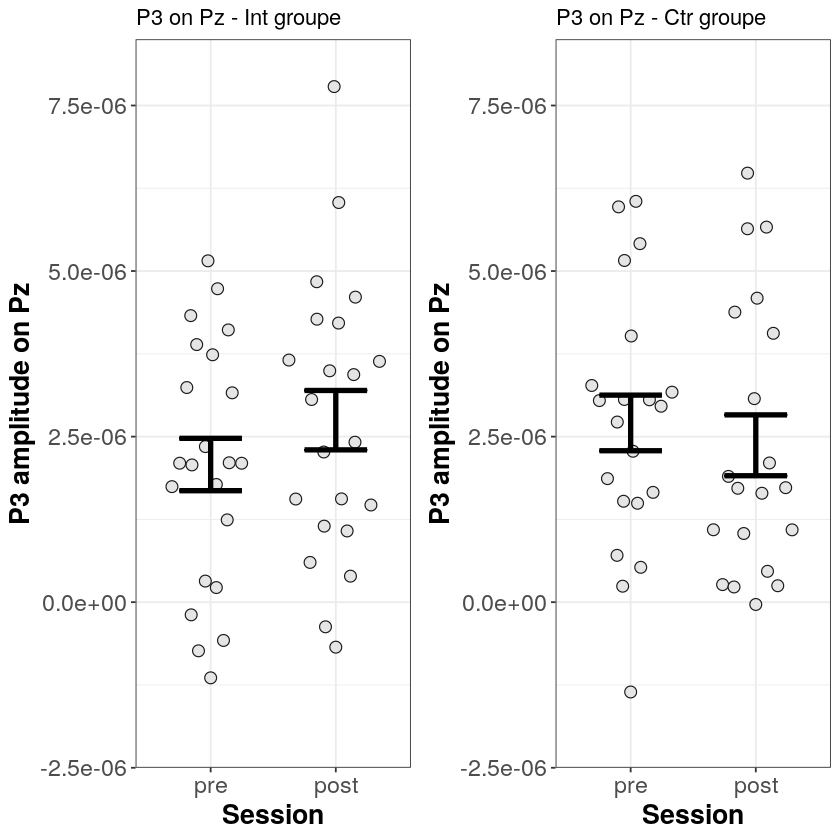

In [33]:
ps1<-plot_scat2(df_int, 
               formula=P3amp~Session,
               ylabel="P3 amplitude on Pz", 
                alpha = 1,
                shape = 21,
                colour = "grey10",
                fill = "grey90",
                size = 3)+
    scale_y_continuous(limits = c(-2e-06, 8e-06))
              
              
#ps1<-ps1+coord_flip()
strip1 <- plot_hd_bars(ps1, 
                     col="black", 
                    q_size = 0.5,
                      md_size = 1.5,
                      alpha = 1)

#ps1<-ps1+strip


strip1<-strip1+ggtitle('P3 on Pz - Int groupe')

ps2<-plot_scat2(df_ctr, 
               formula=P3amp~Session,
               ylabel="P3 amplitude on Pz", 
               alpha = 1,
                shape = 21,
                colour = "grey10",
                fill = "grey90",
                size = 3)+
    scale_y_continuous(limits = c(-2e-06, 8e-06))

              

strip2 <- plot_hd_bars(ps2, 
                     col="black", 
                    q_size = 0.5,
                      md_size = 1.5,
                      alpha = 1)

#ps2<-ps2+strip2
strip2<- strip2+ggtitle('P3 on Pz - Ctr groupe')


grid.arrange(strip1, strip2, ncol=2)
            

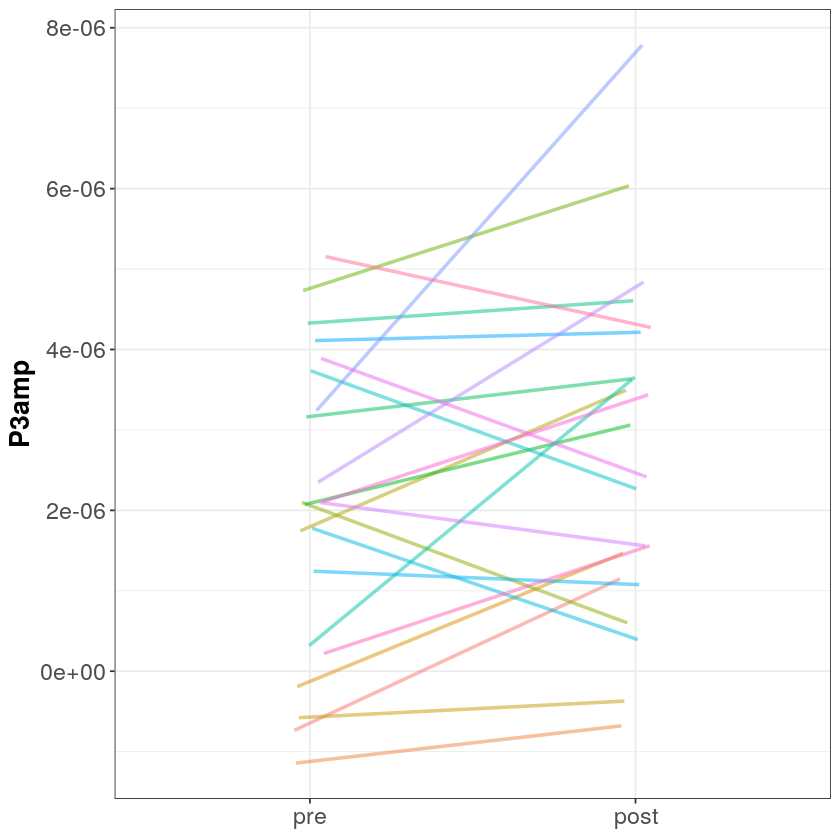

In [36]:
pd <- position_dodge(width = 0.1)
linkedstrip_int <- ggplot(df_int, aes(x=Session, y=P3amp, group=Subject)) +
                geom_line(aes(colour=Subject),size=1, alpha=.5,
                          position=pd) +
                theme_bw() +
                theme(axis.text.x = element_text(size=14),
                      axis.text.y = element_text(size=14),
                      axis.title.x = element_blank(),
                      axis.title.y = element_text(size=16,face="bold"),
                      legend.position="none") #+
                #> labs(title="Paired observations") +
                #ylab("Scores (a.u.)") #+
                #scale_x_discrete(labels = c("pre" = "Pre-test","condition2" = "Condition 2")) +
                #scale_y_continuous(limits=c(0, 30),breaks=seq(0,30,5))
linkedstrip_int

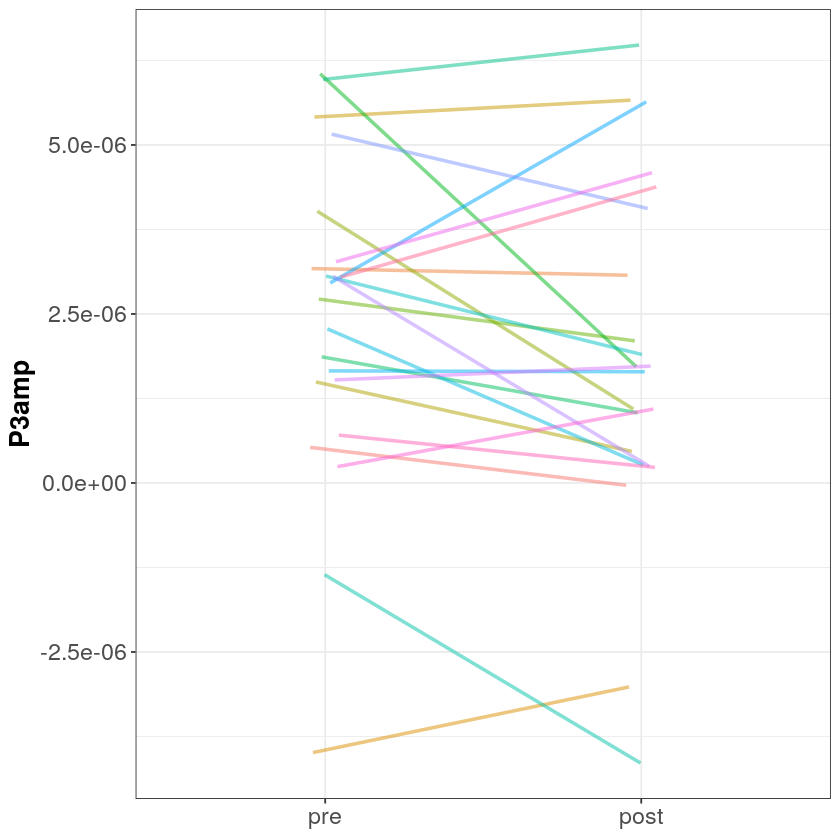

In [35]:
pd <- position_dodge(width = 0.1)
linkedstrip_ctr <- ggplot(df_ctr, aes(x=Session, y=P3amp, group=Subject)) +
                geom_line(aes(colour=Subject),size=1, alpha=.5,
                          position=pd) +
                theme_bw() +
                theme(axis.text.x = element_text(size=14),
                      axis.text.y = element_text(size=14),
                      axis.title.x = element_blank(),
                      axis.title.y = element_text(size=16,face="bold"),
                      legend.position="none") #+
                #> labs(title="Paired observations") +
                #ylab("Scores (a.u.)") #+
                #scale_x_discrete(labels = c("pre" = "Pre-test","condition2" = "Condition 2")) +
                #scale_y_continuous(limits=c(0, 30),breaks=seq(0,30,5))
linkedstrip_ctr

Effect sizes

In [37]:
df_int_post<-df_int %>% filter(Session =='post')
df_ctr_post<-df_ctr %>% filter(Session =='post')

In [38]:
# effect size independent groups
ks(df_int_post$P3amp,df_ctr_post$P3amp )

$test
[1] 0.2727273

$critval
[1] 0.409483

$p.value
[1] 0.3865531

In [39]:
df_int_post<-df_int %>% filter(Session =='post')
df_int_pre<-df_int %>% filter(Session =='pre')
df_ctr_post<-df_ctr %>% filter(Session =='post')
df_ctr_pre<-df_ctr %>% filter(Session =='pre')

In [41]:
ks(df_int_pre$P3amp,df_ctr_pre$P3amp )

$test
[1] 0.1818182

$critval
[1] 0.409483

$p.value
[1] 0.7410023

In [40]:
dep.effect(df_int_pre$P3amp,df_int_post$P3amp, tr = 0.2, nboot = 1000)

,NULL,Est,S,M,L,ci.low,ci.up
AKP,0.0,-0.3658772,0.10,0.30,0.50,-1.06348033,0.06546613
QS (median),0.5,0.4545455,0.46,0.38,0.31,0.04545455,0.50000000
QStr,0.5,0.4090909,0.46,0.38,0.31,0.09090909,0.54545455
SIGN,0.5,0.6818182,0.54,0.62,0.69,0.45400000,0.84800000
